In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import mannwhitneyu, fisher_exact
from sklearn.metrics import classification_report, plot_roc_curve
# from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,KFold,RepeatedKFold,GridSearchCV
from scipy.stats import pearsonr, ttest_ind, levene
from sklearn import svm
#from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
import xgboost

In [2]:
# 导入数据并查看数据基本情况
dataPath = r'C:\Users\75204\Desktop\radiomics\delta-fetures(x2-x1-time)-label.xlsx'
data = pd.read_excel(dataPath)
# data.describe()
data.shape

(303, 1410)

In [3]:
# 数据整理及查看统计
y = data['Label']
Counter(y)

Counter({0: 213, 1: 90})

In [4]:
data_a = data[y == 0]
data_b = data[y == 1]
data_a.shape, data_b.shape

((213, 1410), (90, 1410))

In [5]:
X = data.iloc[:,1:]
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,-0.000058,-0.000058,-0.000336,0.000304,-0.000196,0.000240,-0.000700,-0.000057,-0.028879,-0.000266,...,-8.850778e-07,-3.511247e-08,-0.000381,-6.769165e-07,-1.685951,-0.007149,381.242833,-0.000082,-0.000010,-0.000020
1,0.000002,-0.000035,0.000439,0.001201,0.001702,0.000921,0.000968,0.001293,0.089020,0.001052,...,-1.312825e-08,-1.312825e-08,0.000000,-1.483944e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.000064,-0.000062,-0.000558,0.000110,0.000000,-0.000425,-0.000351,-0.000028,-0.052275,-0.000558,...,2.655994e-04,2.656239e-04,0.000134,1.025903e-05,0.638225,-0.153081,0.000009,-0.000036,-0.000011,0.000006
3,0.000069,-0.001161,-0.003867,0.007850,0.018543,0.000629,0.003008,0.009583,0.144781,0.006763,...,-5.043811e-05,-3.089626e-06,-0.010101,-8.743266e-05,-19.113636,-0.133825,10101.009379,-0.002224,-0.000271,-0.000786
4,0.000083,0.000008,0.003996,0.006632,0.009012,0.008149,0.006790,0.008634,1.632105,0.006529,...,2.183233e-04,1.364048e-05,0.001536,-3.550512e-07,442.913520,0.176148,-609.013396,0.000101,0.000015,0.000002


In [6]:
# 数据标准化
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
X_scal = pd.DataFrame(X_scal,columns = X.columns[:])
X_scal.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,-0.093496,-0.056267,-0.024295,-0.043639,0.011898,0.030868,-0.055311,-0.058250,-0.086015,-0.028781,...,0.048027,0.045247,-0.037040,0.031252,0.050576,-0.051150,0.029136,-0.018670,0.006399,-0.005116
1,-0.028381,-0.029999,0.079579,-0.011865,0.106160,0.066110,-0.018893,-0.028882,-0.033288,0.099391,...,0.048231,0.045256,-0.003390,0.025067,0.051449,-0.050394,-0.036442,0.038544,0.036658,0.003938
2,-0.100142,-0.061056,-0.053986,-0.050505,0.021618,-0.003560,-0.047702,-0.057611,-0.096478,-0.057249,...,0.110324,0.153405,0.008453,0.115065,0.051780,-0.066580,-0.036442,0.013090,0.002512,0.006802
3,0.045575,-1.325980,-0.497239,0.223555,0.942851,0.051003,0.025649,0.151386,-0.008351,0.655121,...,0.036443,0.044004,-0.894947,-0.633647,0.041545,-0.064544,1.701055,-1.522151,-0.817502,-0.344939
4,0.061254,0.019030,0.555911,0.180429,0.469351,0.440317,0.108217,0.130752,0.656807,0.632382,...,0.099272,0.050815,0.132159,0.033719,0.280962,-0.031768,-0.141200,0.109748,0.083849,0.005036


In [7]:
# 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size = 0.3, random_state = 2023, stratify = y)
X_train.shape

(212, 1409)

In [8]:
X_train_a = X_train[y_train == 0]
# X_train_a.head

In [9]:
X_train_b = X_train[y_train == 1]
# X_train_b.head

In [10]:
#t检验 
colNamesSel_t = []
for colName in X_train_a.columns[:]: 
    if levene(X_train_a[colName],X_train_b[colName])[1] > 0.05: 
        if ttest_ind(X_train_a[colName],X_train_b[colName])[1] < 0.05: 
            colNamesSel_t.append(colName)
    else: 
        if ttest_ind(X_train_a[colName],X_train_b[colName],equal_var=False)[1] < 0.05: 
            colNamesSel_t.append(colName)
print(len(colNamesSel_t))
print(colNamesSel_t)

E:\anaconda\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


67
['original_firstorder_RootMeanSquared', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_ShortRunEmphasis', 'exponential_firstorder_Minimum', 'exponential_gldm_DependenceVariance', 'gradient_firstorder_10Percentile', 'gradient_firstorder_Median', 'gradient_gldm_DependenceVariance', 'lbp-2D_firstorder_90Percentile', 'lbp-2D_firstorder_InterquartileRange', 'lbp-2D_firstorder_MeanAbsoluteDeviation', 'lbp-2D_firstorder_RobustMeanAbsoluteDeviation', 'lbp-2D_firstorder_RootMeanSquared', 'lbp-2D_firstorder_Variance', 'lbp-2D_gldm_DependenceVariance', 'logarithm_gldm_LargeDependenceLowGrayLevelEmphasis', 'logarithm_glrlm_RunLengthNonUniformityNormalized', 'logarithm_glrlm_ShortRunEmphasis', 'square_firstorder_10Percentile', 'square_firstorder_RootMeanSquared', 'square_gldm_DependenceVariance', 'squareroot_gldm_LargeDependenceLowGrayLevelEmphasis', 'squareroot_glrlm_RunLengthNonUniformityNormalized', 'squareroot_glrlm_Sho

In [11]:
X_train_t = X_train[colNamesSel_t]
X_test_t = X_test[colNamesSel_t]
X_train_t.shape

(212, 67)

In [12]:
X_train_t = pd.DataFrame(X_train_t,columns = colNamesSel_t)
X_test_t = pd.DataFrame(X_test_t,columns = colNamesSel_t)
X_train_t

,original_firstorder_RootMeanSquared,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunEmphasis,exponential_firstorder_Minimum,exponential_gldm_DependenceVariance,gradient_firstorder_10Percentile,gradient_firstorder_Median,gradient_gldm_DependenceVariance,lbp-2D_firstorder_90Percentile,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_glrlm_RunLengthNonUniformityNormalized,wavelet-LLL_glrlm_RunPercentage,wavelet-LLL_glrlm_ShortRunEmphasis,wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis,wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_ngtdm_Coarseness
159,0.156607,-0.127623,-0.086306,0.005840,0.119897,-0.019623,0.193659,0.138996,-0.019623,-0.491089,...,-0.302164,0.516003,0.439418,-0.117936,-0.165428,-0.007341,0.140654,-0.128281,0.224157,-0.036442
287,-4.602600,4.376212,1.142155,0.951395,3.054202,1.899269,-5.806542,-6.844631,1.899269,5.399037,...,6.418592,-0.432960,-2.172089,1.196180,1.379157,0.936741,-4.499164,3.628848,-3.106103,4.374127
269,1.501553,1.541652,-1.378517,-1.578366,1.914542,0.041334,-1.468185,-1.596539,0.041334,0.447017,...,1.367381,-1.108116,-1.349900,-1.342458,-1.439413,-1.570149,-1.305085,1.656791,-1.683251,1.373494
8,-0.072911,-0.149008,0.008621,0.080453,-0.102538,0.284283,-0.042160,0.106889,0.284283,-0.033019,...,-0.267384,0.321111,0.343389,0.076589,0.102828,0.187923,0.258496,-0.268244,0.267699,-0.263972
285,-0.463017,-0.099279,0.377108,-0.022442,0.434999,-2.196311,-0.550226,-0.358628,-2.196311,-0.176841,...,0.032753,-2.975379,-2.113123,0.377613,0.484522,0.108819,0.311056,-0.988163,1.436572,-0.036442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.784142,-0.033293,-0.175226,-0.157713,0.258796,0.508715,-0.109649,0.157349,0.508715,-0.176841,...,-0.098338,-0.036367,0.051724,-0.196155,-0.097458,-0.172199,0.207345,0.084578,-0.193363,-0.036442
150,-0.019594,-0.043040,0.070913,0.055883,-0.048053,-0.012628,0.043592,0.082033,-0.012628,0.331241,...,-0.010264,-0.111056,-0.075626,0.021258,0.030745,0.014775,0.010783,0.019750,-0.054610,-0.036442
272,0.385310,-0.170910,-0.491637,-0.100803,-0.393941,0.601530,0.567560,0.206346,0.601530,-0.176841,...,-0.690476,1.867090,1.513495,-0.382938,-0.435338,-0.005627,0.177608,-0.400834,0.582029,-0.036442
284,8.586459,5.087002,-2.024307,-3.354075,2.618635,-1.111195,0.440142,0.942485,-1.111195,-0.176841,...,-1.133018,-5.482912,-2.764889,-1.333405,-0.581455,-2.634611,3.045468,2.743300,-4.999764,-0.036434


In [13]:
# LASSO降维
alphas = np.logspace(-10, 1, 100, base = 10)
selector_lasso = LassoCV(alphas=alphas, cv = 5, max_iter = 1000000)

In [14]:
selector_lasso.fit(X_train_t, y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012537793584321832, tolerance: 0.0036000000000000003
  model = cd_fast.enet_coordinate_descent_gram(
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0325076018511119, tolerance: 0.0036000000000000003
  model = cd_fast.enet_coordinate_descent_gram(
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04266663372997215, tolerance: 0.0036000000000000003
  model = cd_fast.enet_coordinate_descent_gram(
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did no

LassoCV(alphas=array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
       2.78255940e-10, 3.59381366e-10, 4.64158883e-10, 5.99484250e-10,
       7.74263683e-10, 1.00000000e-09, 1.29154967e-09, 1.66810054e-09,
       2.15443469e-09, 2.78255940e-09, 3.59381366e-09, 4.64158883e-09,
       5.99484250e-09, 7.74263683e-09, 1.00000000e-08, 1.29154967e-08,
       1.66810054e-08, 2.15443469e-0...
       2.78255940e-02, 3.59381366e-02, 4.64158883e-02, 5.99484250e-02,
       7.74263683e-02, 1.00000000e-01, 1.29154967e-01, 1.66810054e-01,
       2.15443469e-01, 2.78255940e-01, 3.59381366e-01, 4.64158883e-01,
       5.99484250e-01, 7.74263683e-01, 1.00000000e+00, 1.29154967e+00,
       1.66810054e+00, 2.15443469e+00, 2.78255940e+00, 3.59381366e+00,
       4.64158883e+00, 5.99484250e+00, 7.74263683e+00, 1.00000000e+01]),
        cv=5, max_iter=1000000)

In [15]:
print(selector_lasso.alpha_)
values = selector_lasso.coef_[selector_lasso.coef_ != 0]
colNames_sel = X_train_t.columns[selector_lasso.coef_ != 0]
print(colNames_sel)
print(len(X_train_t.columns[selector_lasso.coef_ != 0]))

0.03593813663804626
Index(['original_firstorder_RootMeanSquared', 'lbp-2D_firstorder_90Percentile',
       'wavelet-LLH_ngtdm_Strength', 'wavelet-LHH_firstorder_Skewness',
       'wavelet-LHH_glszm_ZoneEntropy', 'wavelet-HHL_glcm_Autocorrelation',
       'wavelet-HHL_glcm_ClusterShade', 'wavelet-HHH_ngtdm_Coarseness',
       'wavelet-LLL_gldm_HighGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis'],
      dtype='object')
10


In [16]:
coef = pd.Series(values, index = colNames_sel)
coef

original_firstorder_RootMeanSquared       4.668704e-02
lbp-2D_firstorder_90Percentile            7.211634e-02
wavelet-LLH_ngtdm_Strength               -2.537731e-02
wavelet-LHH_firstorder_Skewness          -6.674887e-03
wavelet-LHH_glszm_ZoneEntropy             1.555526e-02
wavelet-HHL_glcm_Autocorrelation         -3.080185e-02
wavelet-HHL_glcm_ClusterShade             2.040500e-04
wavelet-HHH_ngtdm_Coarseness             -1.922508e-03
wavelet-LLL_gldm_HighGrayLevelEmphasis   -7.226990e-03
wavelet-LLL_gldm_LowGrayLevelEmphasis     1.955491e-09
dtype: float64

Text(0.5, 1.0, 'Lasso Model Feature Importance')

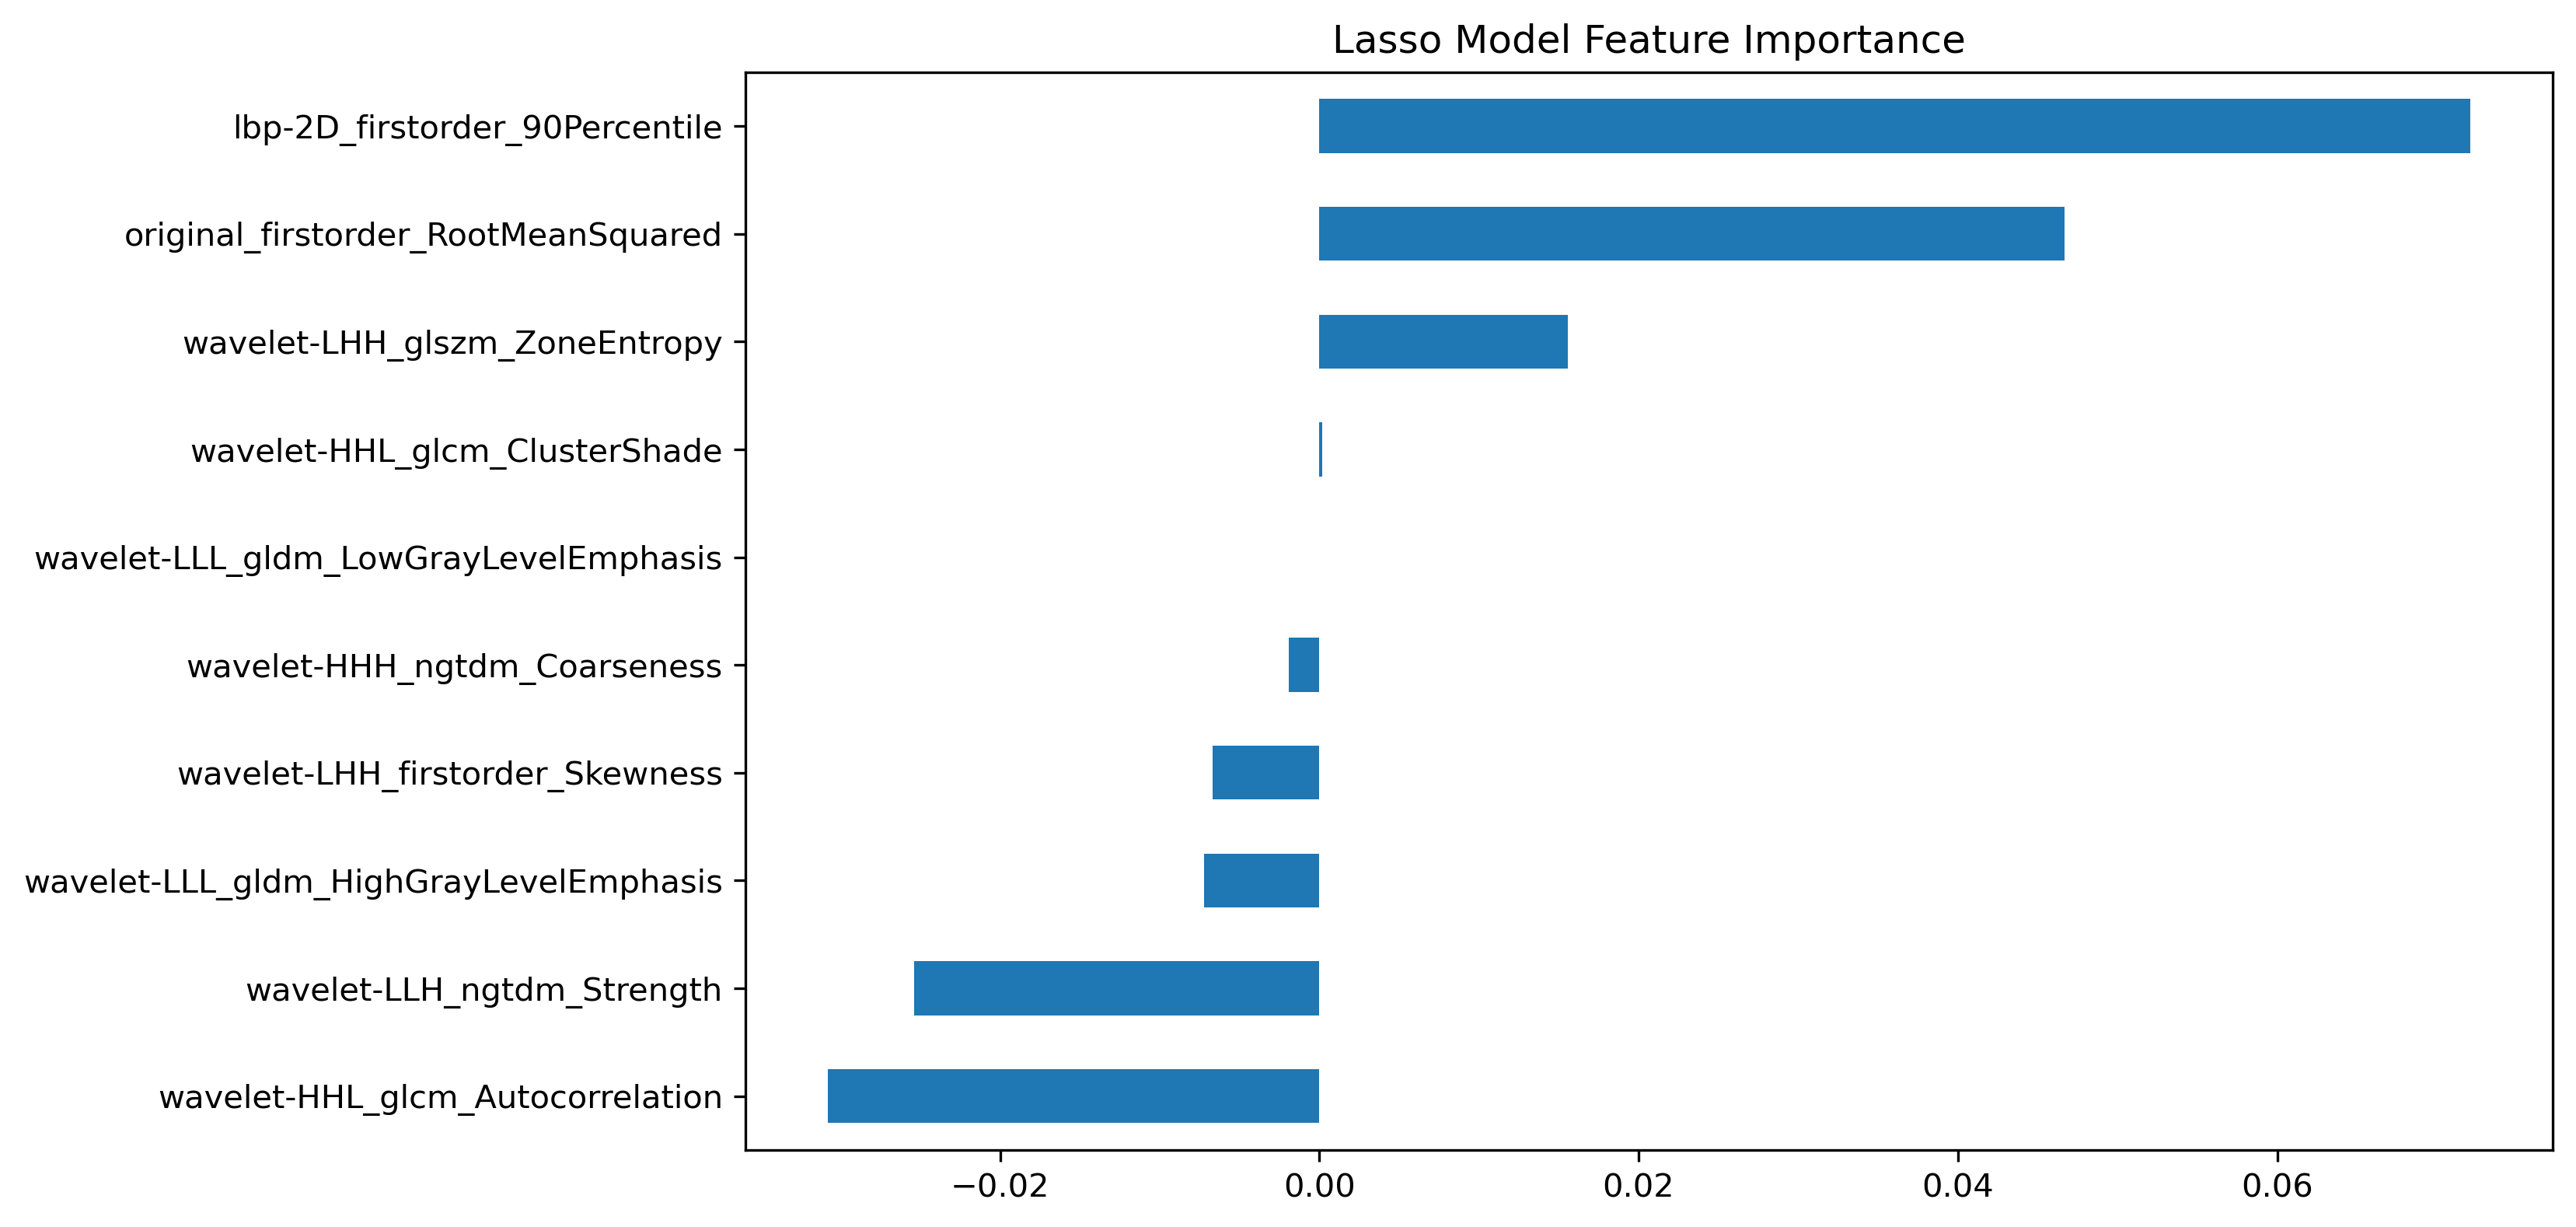

In [18]:
# import matplotlib
# imp_coef = coef.sort_values()
# plt.figure(figsize=(10, 6), dpi=300)
# matplotlib.rcParams['figure.figsize'] = (8, 4)
# imp_coef.plot(kind = "barh")
# plt.title("Lasso Model Feature Importance")
# # plt.savefig('影像组学筛选特征1.png')

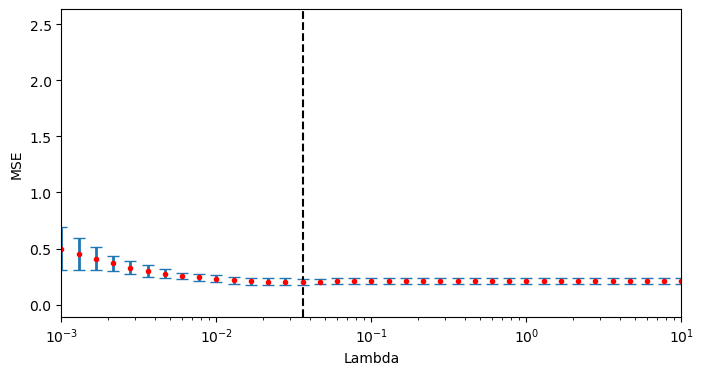

In [19]:
# MSEs_mean = selector_lasso.mse_path_.mean(axis = 1)
# MSEs_std = selector_lasso.mse_path_.std(axis = 1)
# plt.figure()
# plt.errorbar(selector_lasso.alphas_,MSEs_mean    #x, y数据，一一对应
#              , yerr=MSEs_std                    #y误差范围
#              , fmt="o"                          #数据点标记
#              , ms=3                             #数据点大小
#              , mfc="r"                          #数据点颜色
#              , mec="r"                          #数据点边缘颜色
# #              , ecolor="lightblue"               #误差棒颜色
#              , elinewidth=2                     #误差棒线宽
#              , capsize=4                        #误差棒边界线长度
#              , capthick=1)                      #误差棒边界线厚度
# plt.semilogx()
# plt.axvline(selector_lasso.alpha_,color = 'black',ls="--")
# plt.xlim(1e-3,10)
# plt.xlabel('Lambda')
# plt.ylabel('MSE')
# # plt.show()
# plt.savefig('Lasso超参数选择.png')

D:\Anaconda3\envs\fang-tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017766034144429454, tolerance: 0.0063
  positive,
D:\Anaconda3\envs\fang-tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026822603626335706, tolerance: 0.0063
  positive,
D:\Anaconda3\envs\fang-tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.042097248536130394, tolerance: 0.0063
  positive,
D:\Anaconda3\envs\fang-tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

Text(0, 0.5, 'Coefficients')

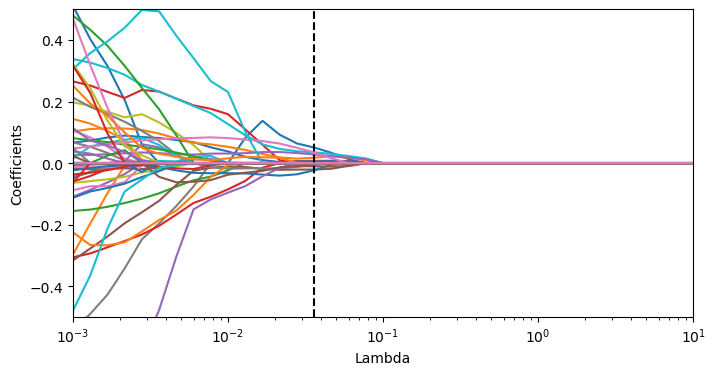

In [20]:
# coefs = selector_lasso.path(X_train_t, y_train, alphas=alphas
#                             , max_iter = 1e6
#                            )[1].T
# plt.figure()
# plt.semilogx(selector_lasso.alphas_,coefs, '-')
# plt.axvline(selector_lasso.alpha_,color = 'black',ls="--")
# plt.xlim(1e-3,10)
# plt.ylim(-0.5,0.5)
# plt.xlabel('Lambda')
# plt.ylabel('Coefficients')
# # plt.show()
# # plt.savefig('影像组学特征Lasso系数分布图.png')

In [17]:
X_train_t_lasso = X_train_t[X_train_t.columns[selector_lasso.coef_ != 0]]
X_test_t_lasso = X_test_t[X_test_t.columns[selector_lasso.coef_ != 0]]

X_train_t_lasso.columns

Index(['original_firstorder_RootMeanSquared', 'lbp-2D_firstorder_90Percentile',
       'wavelet-LLH_ngtdm_Strength', 'wavelet-LHH_firstorder_Skewness',
       'wavelet-LHH_glszm_ZoneEntropy', 'wavelet-HHL_glcm_Autocorrelation',
       'wavelet-HHL_glcm_ClusterShade', 'wavelet-HHH_ngtdm_Coarseness',
       'wavelet-LLL_gldm_HighGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis'],
      dtype='object')

In [28]:
def confindence_interval_compute(y_pred, y_true):
    n_bootstraps = 1000
    rng_seed = 100  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        #        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        indices = rng.randint(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_std = sorted_scores.std()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    return confidence_lower, confidence_upper, confidence_std

In [19]:
    #linear svc 10
svc = svm.SVC(kernel = 'linear',C = 1.0, gamma = 'auto',probability = True)
svc.fit(X_train_t_lasso,y_train)
    # Random Forest Classifier 随机森林分类器 10
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train_t_lasso,y_train)
    # Logistic Regression Classifier 逻辑回归分类器 15
LRC = LogisticRegression(penalty='l2')
LRC.fit(X_train_t_lasso,y_train)
    # Decision Tree Classifier决策树分类器
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_t_lasso,y_train)
    #  Gradient Boosting Decision Tree Classifier 梯度增强决策树分类器
GBDT =  GradientBoostingClassifier(n_estimators=200)
GBDT.fit(X_train_t_lasso,y_train)
    #   KNN Classifier 最近邻规则分类器
knn =  KNeighborsClassifier()
knn.fit(X_train_t_lasso,y_train)
    #   Ada Boost Classifier 增强学习分类器
Ada =  AdaBoostClassifier()
Ada.fit(X_train_t_lasso,y_train)
    #   GaussianNB Classifier 高斯贝叶斯分类器
GNB =  GaussianNB()
GNB.fit(X_train_t_lasso,y_train)
    #   Linear Discriminant Analysis Classifier 线性判断分析分类器
LDA =  LinearDiscriminantAnalysis()
LDA.fit(X_train_t_lasso,y_train)
    #  xgboost Classifier 极端梯度增加分类器
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train_t_lasso,y_train)
    #   BernoulliNB Classifier 伯努利贝叶斯分类器
BNB = BernoulliNB()
BNB.fit(X_train_t_lasso,y_train)
    #   SGDClassifier 随机梯度下降分类器
SGD = SGDClassifier(random_state=42)
SGD.fit(X_train_t_lasso,y_train)
    #  MLPClassifier 多层感知机分类器 10
MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_train_t_lasso,y_train)
    #  QuadraticDiscriminantAnalysis Classifier 二次判别分析分类器
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_t_lasso,y_train)

E:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [97]:
# 对于高斯朴素贝叶斯（Gaussian Naive Bayes，GNB）分类器，由于它的参数较少，通常不需要执行网格搜索来调整超参数。
# GNB 主要关注于计算各类别的均值和方差，因此它只有一个重要的参数 - 先验概率。
from sklearn.model_selection import cross_val_score

# 定义不同的先验概率值
priors = np.linspace(0.1, 0.9, 9)  # 示例中使用了9个不同的先验概率值

# 使用交叉验证评估每个先验概率值的性能
best_score = -1
best_prior = None

for prior in priors:
    GNB.set_params(priors=[prior, 1-prior])
    scores = cross_val_score(GNB, X_train, y_train, cv=5, scoring='accuracy')  # 使用交叉验证计算精度分数
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_prior = prior

print("Best GaussianNB prior:", best_prior)
print("Best accuracy score:", best_score)

# 使用最佳先验概率训练最终模型
GNB.set_params(priors=[best_prior, 1-best_prior])
GNB.fit(X_train_t_lasso,y_train)

# 使用训练好的模型进行预测
y_pred = GNB.predict(X_test_t_lasso)
print(y_pred)


Best GaussianNB prior: 0.1
Best accuracy score: 0.7498338870431893
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0]


In [21]:
from sklearn.model_selection import GridSearchCV

# 定义每个分类器的参数网格
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['auto', 'scale']}
param_grid_rf = {'n_estimators': [50, 100, 200]}
param_grid_LRC = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
param_grid_dt = {'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_GBDT = { 'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 4, 5]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
param_grid_Ada = { 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
param_grid_LDA = {'solver': ['lsqr', 'eigen'],  # 两种不同的求解器
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]}  # 不同的正则化参数值
param_grid_xgb = { 'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5],'min_child_weight': [1, 2, 3],
              'gamma': [0, 0.1, 0.2],'subsample': [0.8, 0.9, 1.0],'colsample_bytree': [0.8, 0.9, 1.0], 'reg_alpha': [0, 0.1, 0.5],
              'reg_lambda': [0, 0.1, 0.5]}
param_grid_BNB = { 'alpha': [0.1, 0.5, 1.0, 2.0],  # 不同的拉普拉斯平滑参数
    'binarize': [0.0, 0.1, 0.2, 0.3]}  # 不同的二值化阈值
# param_grid_SGD = { 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'penalty': ['l2', 'l1', 'elasticnet'], 'max_iter': [1000, 2000, 3000], 'tol': [1e-3, 1e-4, 1e-5]}
param_grid_MLP = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}
param_grid_QDA = {'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}



# 其他分类器的参数网格也可以在这里定义

# 使用GridSearchCV对每个分类器进行参数搜索
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_LRC = GridSearchCV(estimator=LRC, param_grid=param_grid_LRC, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_GBDT = GridSearchCV(estimator=GBDT, param_grid=param_grid_GBDT, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_Ada = GridSearchCV(estimator=Ada, param_grid=param_grid_Ada, cv=5, scoring='accuracy')
grid_search_LDA = GridSearchCV(estimator=LDA, param_grid=param_grid_LDA, cv=5, scoring='accuracy')
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_BNB = GridSearchCV(estimator=BNB, param_grid=param_grid_BNB, cv=5, scoring='accuracy')
# grid_search_SGD = GridSearchCV(estimator=SGD, param_grid=param_grid_SGD, cv=5, scoring='accuracy')
grid_search_MLP = GridSearchCV(estimator=MLP, param_grid=param_grid_MLP, cv=5, scoring='accuracy')
grid_search_QDA = GridSearchCV(estimator=QDA, param_grid=param_grid_QDA, cv=5, scoring='accuracy')


# 训练模型并进行参数搜索
grid_search_svc.fit(X_train_t_lasso,y_train)
grid_search_rf.fit(X_train_t_lasso,y_train)
grid_search_LRC.fit(X_train_t_lasso,y_train)
grid_search_dt.fit(X_train_t_lasso,y_train)
grid_search_GBDT.fit(X_train_t_lasso,y_train)
grid_search_knn.fit(X_train_t_lasso,y_train)
grid_search_Ada.fit(X_train_t_lasso,y_train)
grid_search_LDA.fit(X_train_t_lasso,y_train)
grid_search_xgb.fit(X_train_t_lasso,y_train)
grid_search_BNB.fit(X_train_t_lasso,y_train)
# grid_search_SGD.fit(X_train_t_lasso,y_train)
grid_search_MLP.fit(X_train_t_lasso,y_train)
grid_search_QDA.fit(X_train_t_lasso,y_train)


# 打印最佳参数和最佳分数
print("Best parameters for SVC: ", grid_search_svc.best_params_)
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best parameters for Logistic Regression: ", grid_search_LRC.best_params_)
print("Best parameters for Decision Tree Classifier: ", grid_search_dt.best_params_)
print("Best parameters for GBDT Classifier: ", grid_search_GBDT.best_params_)
print("Best parameters for knn Classifier: ", grid_search_knn.best_params_)
print("Best parameters for Ada Classifier: ", grid_search_Ada.best_params_)
print("Best parameters for LDA Classifier: ", grid_search_LDA.best_params_)
print("Best parameters for Xgboost: ", grid_search_xgb.best_params_)
print("Best parameters for BNB Classifier: ", grid_search_BNB.best_params_)
# print("Best parameters for SGD Classifier: ", grid_search_SGD.best_params_)
print("Best parameters for MLP Classifier: ", grid_search_MLP.best_params_)
print("Best parameters for QDA Classifier: ", grid_search_QDA.best_params_)
# 对其他分类器也打印最佳参数

# 获取最佳分类器
best_svc = grid_search_svc.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_LRC = grid_search_LRC.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_GBDT = grid_search_GBDT.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_Ada = grid_search_Ada.best_estimator_
best_LDA = grid_search_LDA.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_BNB = grid_search_BNB.best_estimator_
# best_SGD = grid_search_SGD.best_estimator_
best_MLP = grid_search_MLP.best_estimator_
best_QDA = grid_search_QDA.best_estimator_

# 使用最佳分类器进行预测
# y_pred_svc = best_svc.predict(X_test_t_lasso)
# y_pred_rf = best_rf.predict(X_test_t_lasso)
# y_pred_LRC = best_LRC.predict(X_test_t_lasso)



E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pe

KeyboardInterrupt: 

In [31]:
# def multi_models_roc(names, sampling_methods, colors,X_train, y_train, X_test, y_test, save=True, dpin=100):
def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
        plt.figure(figsize=(20, 20), dpi=dpin)

        for (name, method, colorname) in zip(names, sampling_methods, colors):
#             method.fit(X_train, y_train)
            y_test_preds = method.predict(X_test)
            y_test_predprob = method.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            roc_auc = auc(fpr, tpr)
            auc_fl, auc_fh, auc_fstd = confindence_interval_compute(np.array(y_test_predprob),np.array(y_test) )
            print('AUC:%.3f' % roc_auc, '+/-%.3f' % auc_fstd, '  95% CI:[', '%.3f,' % auc_fl, '%.3f' % auc_fh,
              ']')
            plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
            plt.axis('square')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=20)

        if save:
            plt.savefig('multi_models_roc.png')
            
        return plt

AUC:0.502 +/-0.068   95% CI:[ 0.391, 0.613 ]
AUC:0.698 +/-0.065   95% CI:[ 0.591, 0.803 ]
AUC:0.603 +/-0.064   95% CI:[ 0.482, 0.697 ]
AUC:0.527 +/-0.069   95% CI:[ 0.409, 0.641 ]
AUC:0.626 +/-0.056   95% CI:[ 0.534, 0.717 ]
AUC:0.715 +/-0.055   95% CI:[ 0.623, 0.803 ]
AUC:0.762 +/-0.057   95% CI:[ 0.660, 0.852 ]
AUC:0.524 +/-0.069   95% CI:[ 0.410, 0.634 ]
AUC:0.757 +/-0.057   95% CI:[ 0.660, 0.849 ]
AUC:0.734 +/-0.057   95% CI:[ 0.637, 0.827 ]
AUC:0.612 +/-0.072   95% CI:[ 0.485, 0.722 ]
AUC:0.568 +/-0.070   95% CI:[ 0.451, 0.682 ]


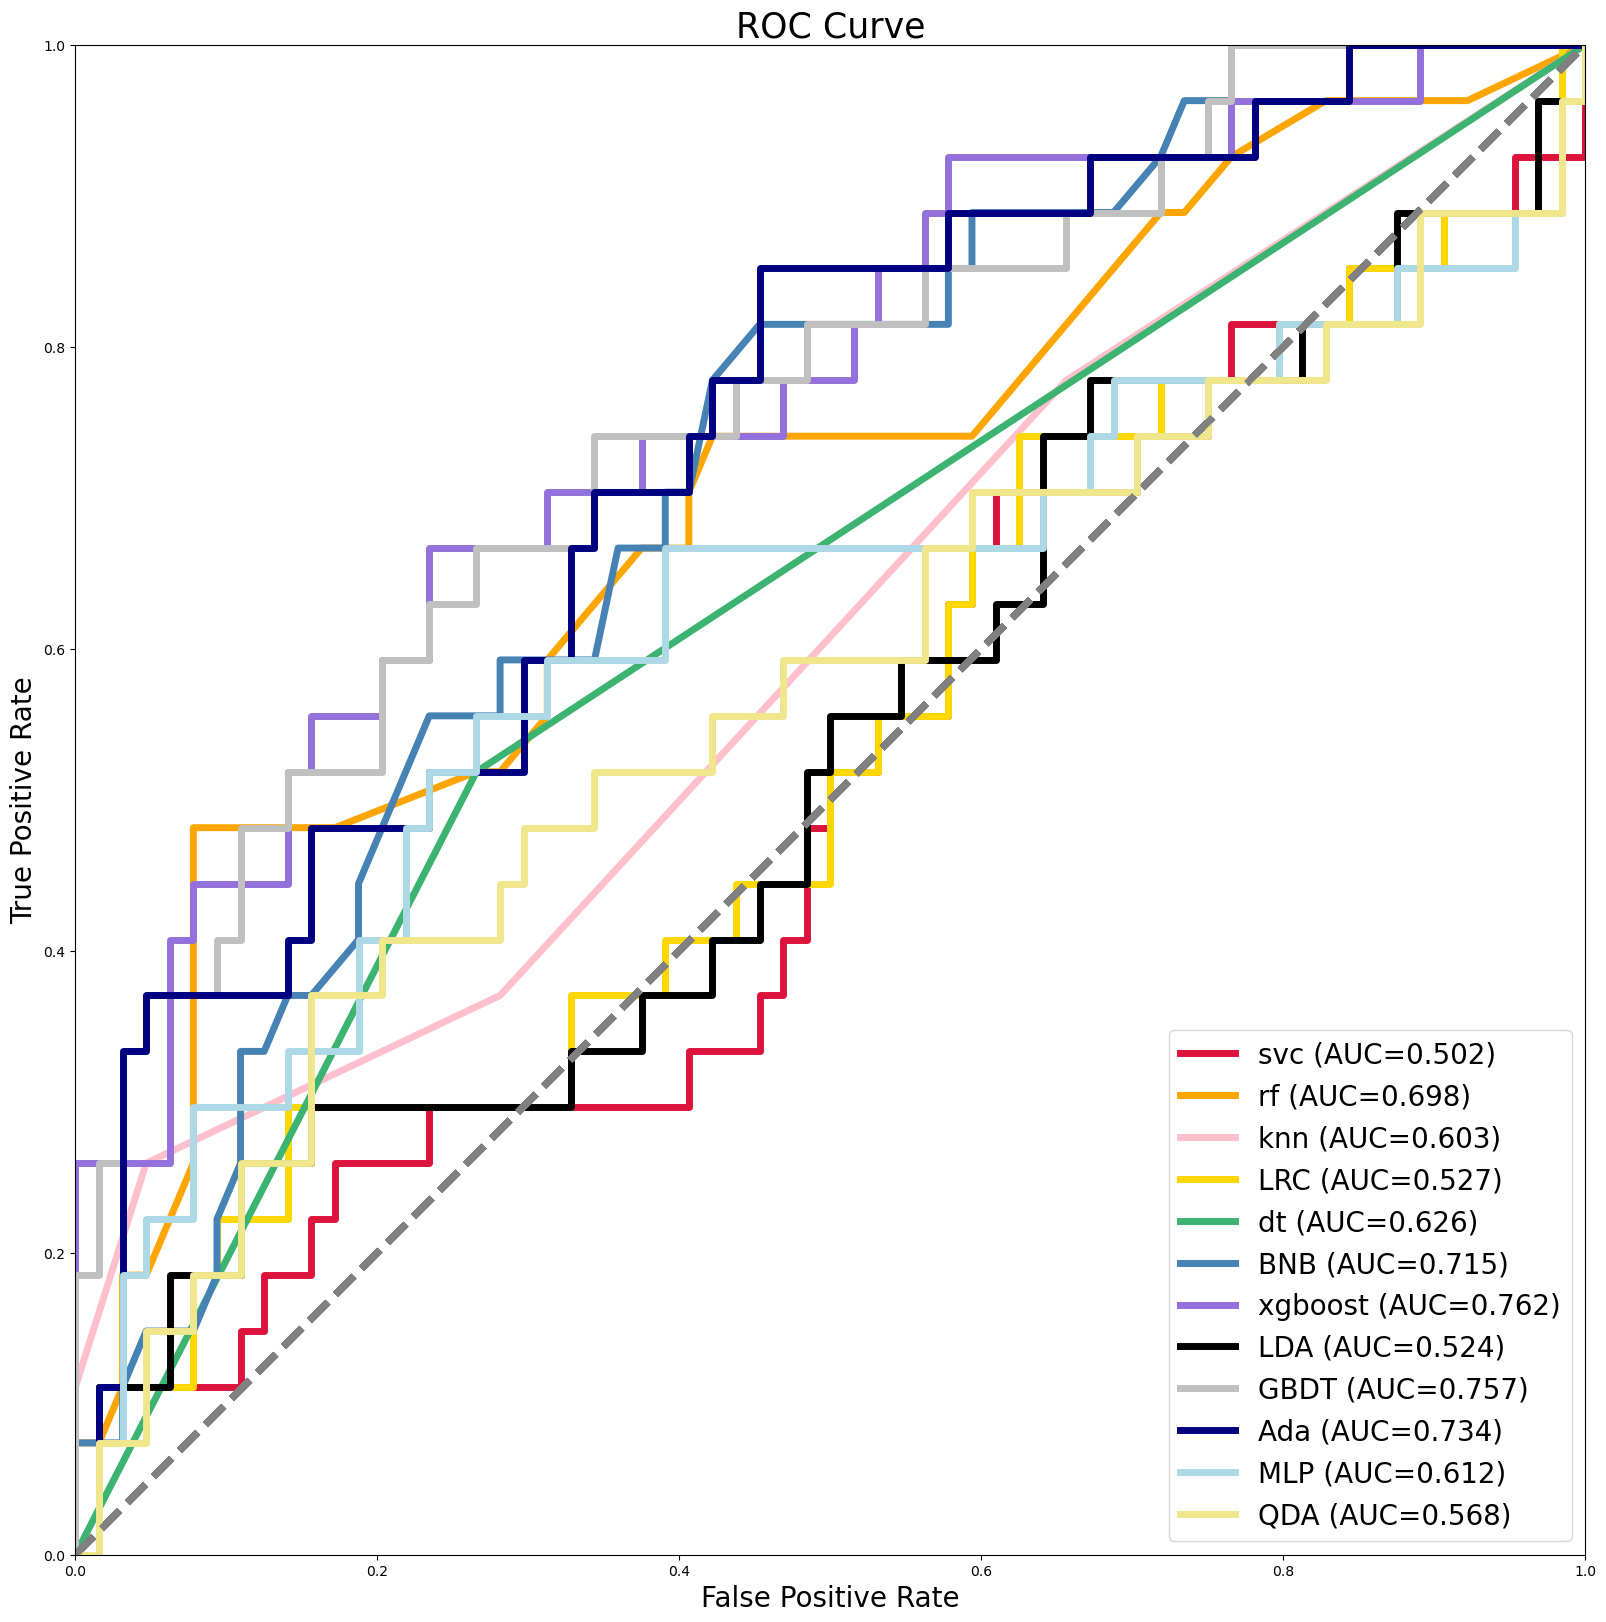

In [32]:
names = ['svc',
         'rf',
         'knn',
         'LRC',
         'dt',
         'BNB',
         'xgboost',
         'LDA',
         'GBDT',
         'Ada',
#          'SGD',
         'MLP',
         'QDA'
         ]
 
# sampling_methods里为 y_pred.
sampling_methods = [svc,
                    rf,
                    knn,
                    LRC,
                    dt,
                    BNB,
                    xgb,
                    LDA,
                    GBDT,
                    Ada,
#                     SGD,
                     MLP,
                     QDA
                   ]
#color:'crimson','orange','gold','mediumseagreen','steelblue', 'mediumpurple' 
colors = ['crimson',
          'orange',
          'pink',
          'gold',
          'mediumseagreen',
          'steelblue', 
          'mediumpurple' ,
          'black',
          'silver',
          'navy',
#           'blue',
#           'gray',
          'lightblue',
          'khaki'
         ]
 
# linestyles = ['-', '--', '-.', ':', 'dotted', 'dashdot', '--', 'solid', 'dashed']
 
#ROC curves
# train_roc_graph = multi_models_roc(names, prob_results, colors, linestyles,  Y_test_smo_tmo, save = True)
# train_roc_graph.savefig('ROC_Train_all.png')

 
#ROC curves
# train_roc_graph = multi_models_roc(names, sampling_methods, colors, X_train_t_lasso,y_train,X_test_t_lasso,y_test,save = False)
test_roc_graph = multi_models_roc(names, sampling_methods, colors, X_test_t_lasso,y_test,save = False)

AUC:0.728 +/-0.038   95% CI:[ 0.665, 0.791 ]
AUC:1.000 +/-0.000   95% CI:[ 1.000, 1.000 ]
AUC:0.868 +/-0.024   95% CI:[ 0.828, 0.906 ]
AUC:0.744 +/-0.036   95% CI:[ 0.685, 0.802 ]
AUC:1.000 +/-0.000   95% CI:[ 1.000, 1.000 ]
AUC:0.763 +/-0.034   95% CI:[ 0.706, 0.818 ]
AUC:1.000 +/-0.000   95% CI:[ 1.000, 1.000 ]
AUC:0.740 +/-0.036   95% CI:[ 0.685, 0.802 ]
AUC:1.000 +/-0.000   95% CI:[ 1.000, 1.000 ]
AUC:0.997 +/-0.002   95% CI:[ 0.993, 1.000 ]
AUC:0.923 +/-0.018   95% CI:[ 0.891, 0.950 ]
AUC:0.780 +/-0.036   95% CI:[ 0.722, 0.839 ]


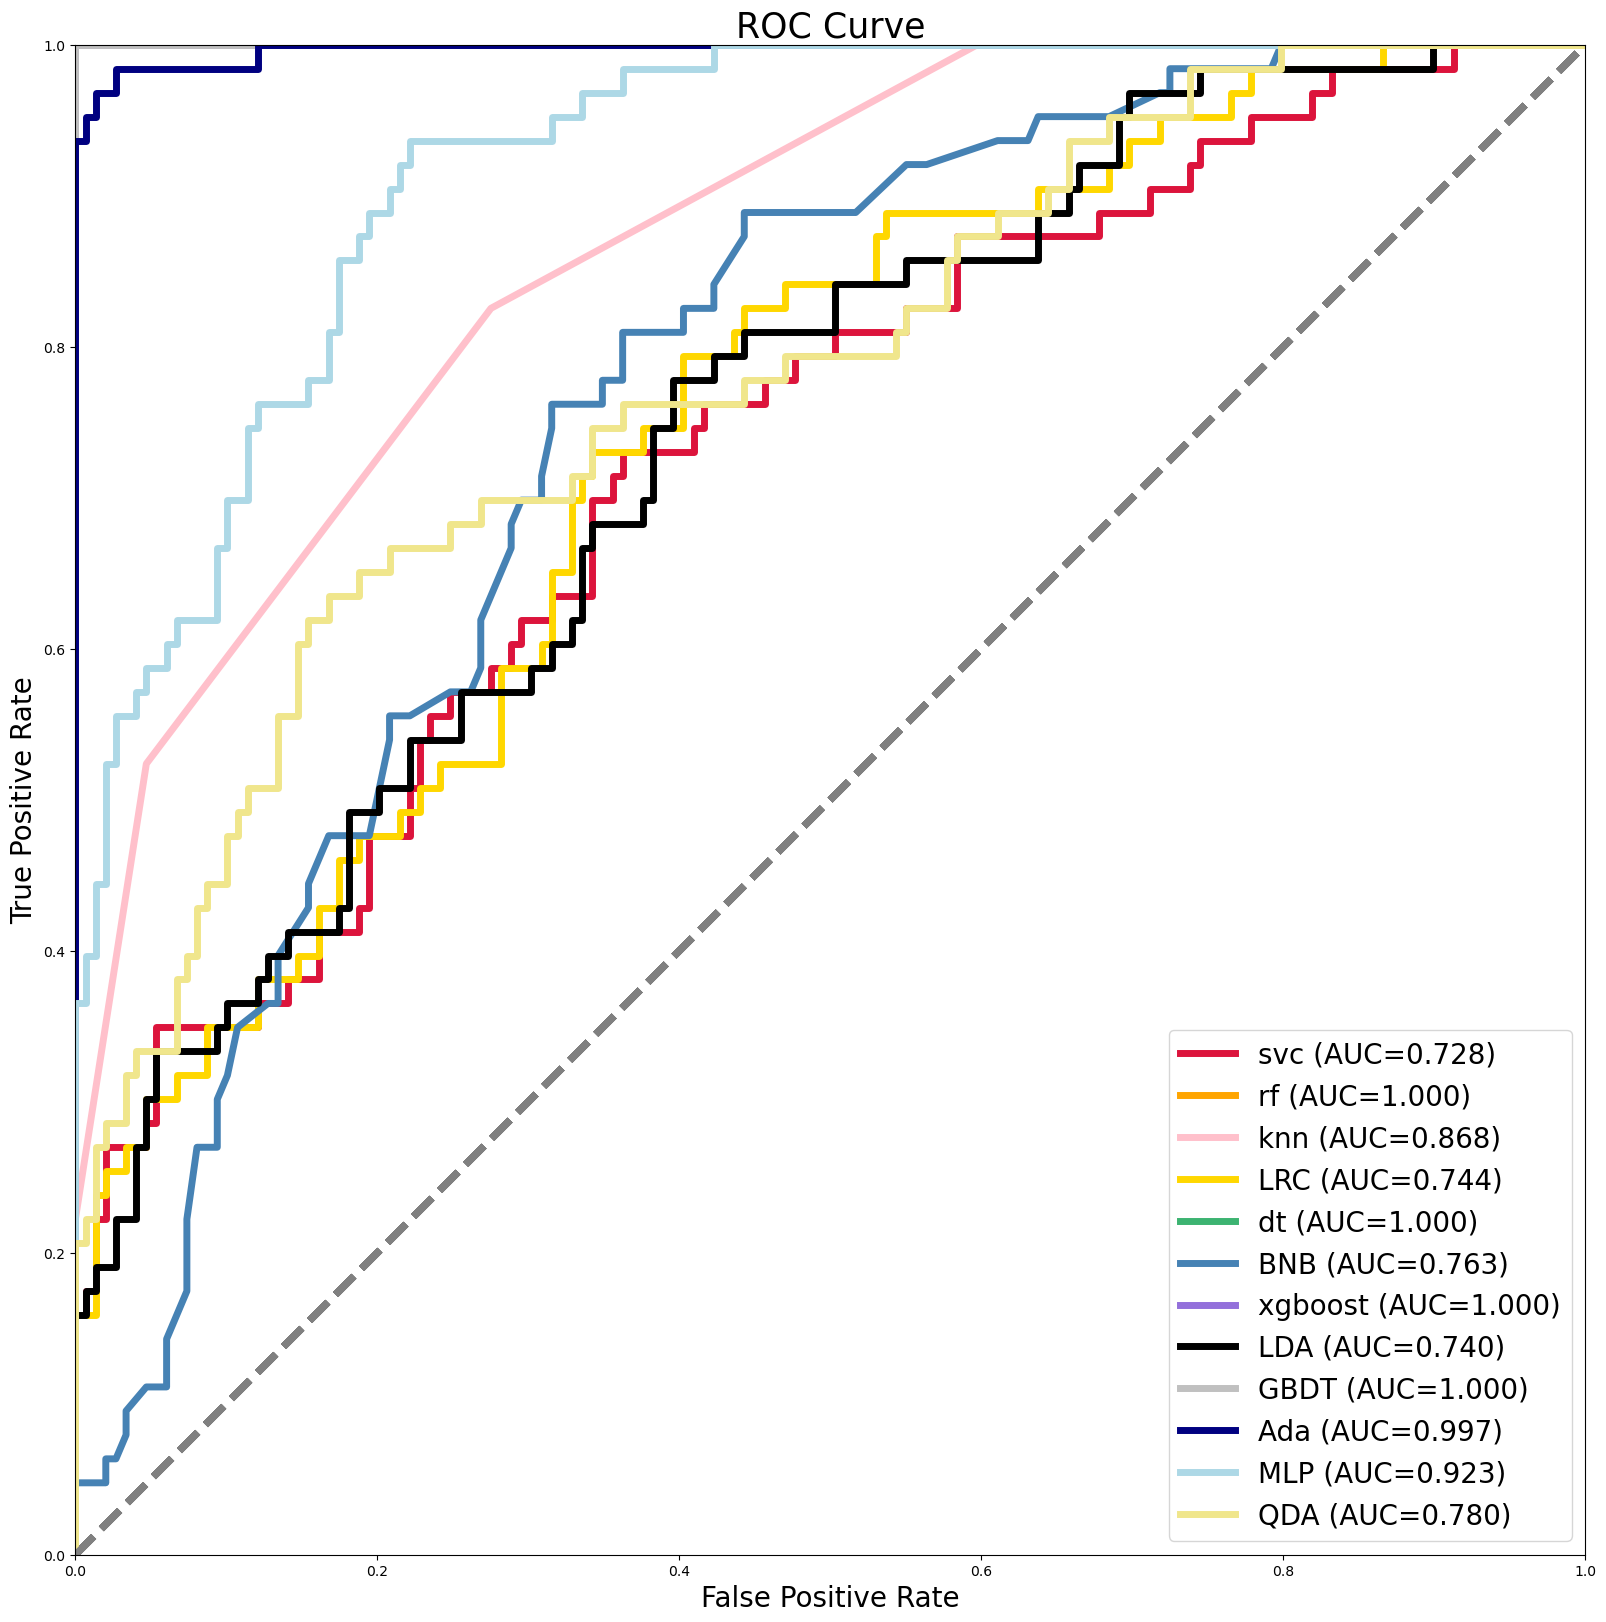

In [33]:
test_roc_graph = multi_models_roc(names, sampling_methods, colors, X_train_t_lasso,y_train,save = False)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
AUC: 0.736111111111111


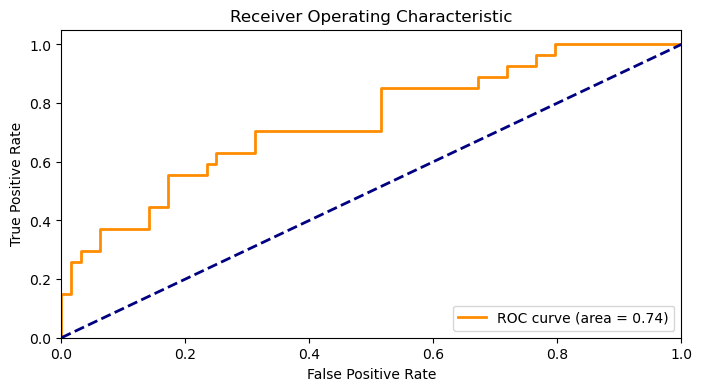

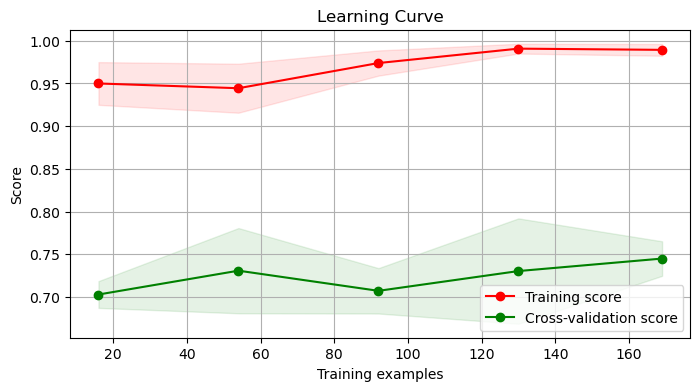

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
# 创建随机森林分类器
rf_classifier = RandomForestClassifier(random_state=42)

# 定义要调优的参数网格
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用交叉验证和网格搜索来寻找最佳参数
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search.fit(X_train_t_lasso, y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳参数的随机森林分类器进行预测
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_t_lasso)
y_score = best_rf_classifier.predict_proba(X_test_t_lasso)[:, 1]

# 计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 使用学习曲线来检查过拟合
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_classifier, X_train_t_lasso, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
# 平衡数据
# smo = SMOTE()
# X_train_mul_scal_lasso_smo, y_train_smo = smo.fit_resample(X_train_mul_scal_lasso,y_train)